In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import csv
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (','.join(row))

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [3]:
file_columns = ['sepal_len','sepal_width','petal_len','petal_width','class']
data = pd.read_csv('iris.data.txt',header=None, names=file_columns)
data.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


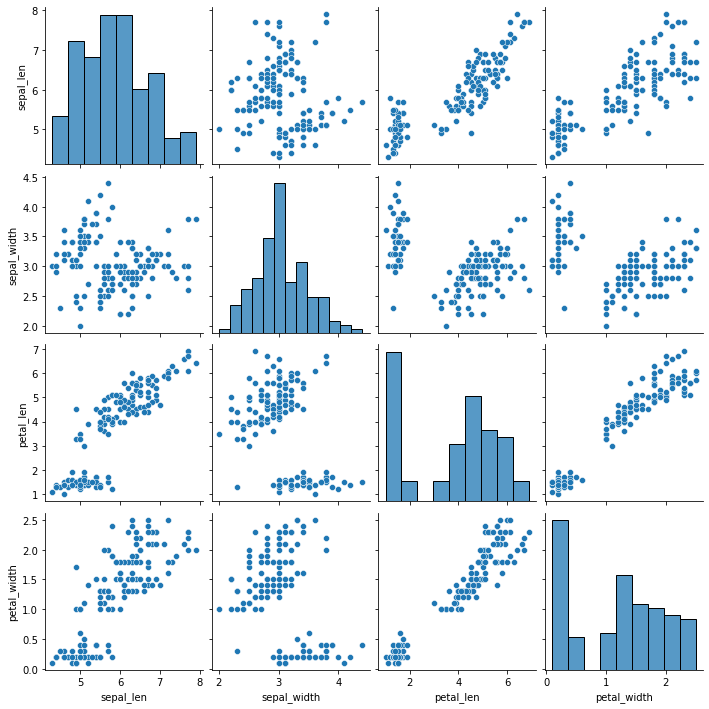

In [4]:
sns.pairplot(data)

In [5]:
X = data.iloc[:,:4]
y = data['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_knn = knn3.predict(X_test)

In [9]:
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print(acc_knn)

0.947


In [10]:
k_range  = range(3,21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
    scores.append(acc_knn)

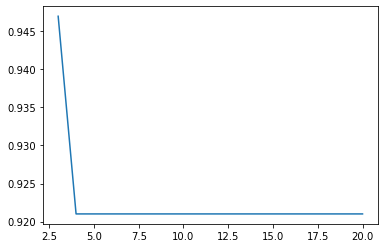

In [11]:
plt.plot(k_range,scores)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
y_pred_knn = knn6.predict(X_test)

In [13]:
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print('KNN Accuracy: '+ str(round(acc_knn,3)))

KNN Accuracy: 0.921


In [14]:
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

In [15]:
def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

In [16]:
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
      # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

In [17]:
import operator

In [18]:
indices = np.random.permutation(data.shape[0])
div = int(0.7 * len(indices))
development_id, test_id = indices[:div], indices[div:]

development_set, test_set = data.loc[development_id,:], data.loc[test_id,:]
print("Development Set:\n", development_set, "\n\nTest Set:\n", test_set)

Development Set:
      sepal_len  sepal_width  petal_len  petal_width            class
89         5.5          2.5        4.0          1.3  Iris-versicolor
52         6.9          3.1        4.9          1.5  Iris-versicolor
128        6.4          2.8        5.6          2.1   Iris-virginica
31         5.4          3.4        1.5          0.4      Iris-setosa
142        5.8          2.7        5.1          1.9   Iris-virginica
..         ...          ...        ...          ...              ...
127        6.1          3.0        4.9          1.8   Iris-virginica
8          4.4          2.9        1.4          0.2      Iris-setosa
15         5.7          4.4        1.5          0.4      Iris-setosa
42         4.4          3.2        1.3          0.2      Iris-setosa
35         5.0          3.2        1.2          0.2      Iris-setosa

[105 rows x 5 columns] 

Test Set:
      sepal_len  sepal_width  petal_len  petal_width            class
94         5.6          2.7        4.2          

In [19]:
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

In [20]:
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1])

In [21]:
row_list = []
for index, rows in development_set.iterrows():
    my_list =[rows.sepal_len, rows.sepal_width, rows.petal_len, rows.petal_width]       
    row_list.append([my_list])

In [22]:
k_n = [1, 3, 5, 7]

In [23]:
distance_methods = ['euclidean', 'normalized_euclidean']

In [ ]:
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_obs_k[k] = development_set_obs
    obs_k[dist_method] = development_set_obs_k
print(obs_k)

In [ ]:
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))


df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)